<a href="https://colab.research.google.com/github/Mahmoud74xx/SYNC-intern-s/blob/main/Handwritten_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical

In [ ]:
# Load the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:

# Separate labels and features
X = train.drop('label', axis=1)
y = train['label']

# Reshape and normalize the data
X = X.values.reshape(-1, 28, 28, 1) / 255.0
test = test.values.reshape(-1, 28, 28, 1) / 255.0


In [ ]:
# Convert labels to one-hot encoded format
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/10
65/65 [==============================] - 7s 82ms/step - loss: 0.8521 - accuracy: 0.7449 - val_loss: nan - val_accuracy: 0.9040
Epoch 2/10
65/65 [==============================] - 6s 91ms/step - loss: 0.2282 - accuracy: 0.9321 - val_loss: nan - val_accuracy: 0.9564
Epoch 3/10
65/65 [==============================] - 6s 90ms/step - loss: 0.1406 - accuracy: 0.9597 - val_loss: nan - val_accuracy: 0.9575
Epoch 4/10
65/65 [==============================] - 5s 78ms/step - loss: 0.1060 - accuracy: 0.9685 - val_loss: nan - val_accuracy: 0.9618
Epoch 5/10
65/65 [==============================] - 7s 101ms/step - loss: 0.0864 - accuracy: 0.9732 - val_loss: nan - val_accuracy: 0.9564
Epoch 6/10
65/65 [==============================] - 5s 78ms/step - loss: 0.0710 - accuracy: 0.9770 - val_loss: nan - val_accuracy: 0.9695
Epoch 7/10
65/65 [==============================] - 7s 102ms/step - loss: 0.0585 - accuracy: 0.9816 - val_loss: nan - val_accuracy: 0.9749
Epoch 8/10
65/65 [==============

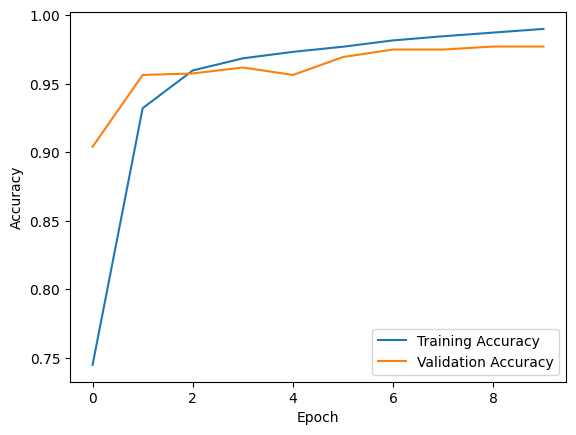

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test data
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

288/288 [==============================] - 2s 7ms/step


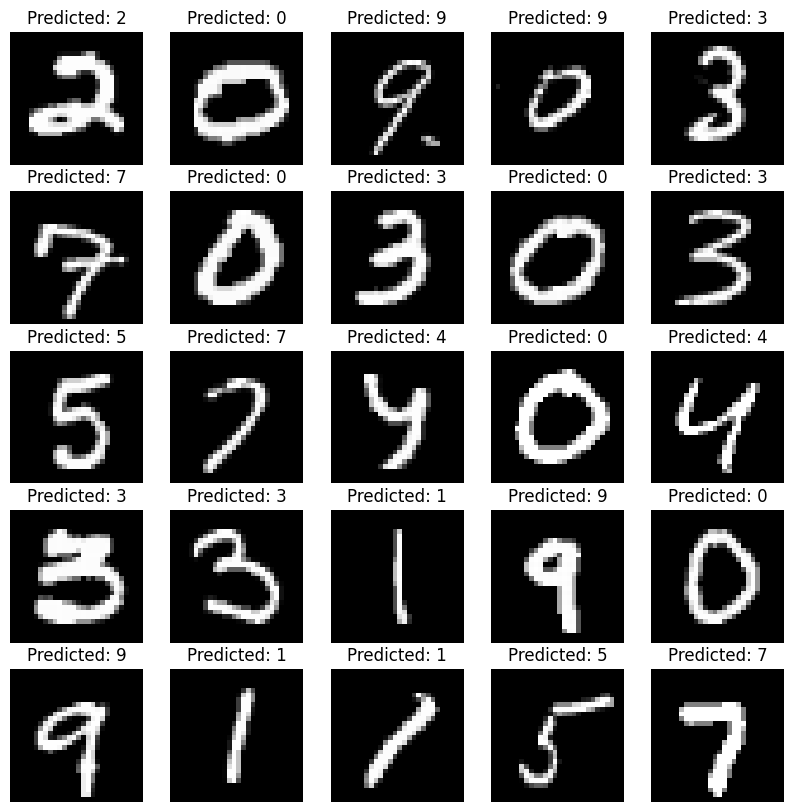

In [ ]:
# Display some sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()
